In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# for plotting 
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Read the file 
df_company = pd.read_csv("companies.txt",sep="\t",encoding="unicode_escape")


In [4]:
# import codecs
import codecs

df = codecs.open("rounds2.csv","r",encoding='utf-8',
                            errors='ignore')
df_round = pd.read_csv(df)

In [5]:
# see first five rows
df_company.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
df_round.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
# check shape
df_company.shape

(66368, 10)

In [8]:
# check shape
df_round.shape

(114949, 6)

In [9]:
# type
df_company.dtypes

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
dtype: object

In [10]:
# type
df_round.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [11]:
# description 
df_company.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Wappa,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [12]:
# description 
df_round.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [13]:
# finding missing values
df_company.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [14]:
# so we have missing values lets compute them 
df_company = df_company.fillna(0)
df_company.isnull().sum()

permalink        0
name             0
homepage_url     0
category_list    0
status           0
country_code     0
state_code       0
region           0
city             0
founded_at       0
dtype: int64

In [15]:
# for other dataset 
df_round.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [16]:
# fill missing values 
df_round = df_round.fillna(0)
df_round.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funding_round_code         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [17]:
# now check the company uniqueness in both datasets
len(df_company['permalink'].unique())

66368

In [18]:
len(df_round['company_permalink'].unique())

90247

In [19]:
# for proper data cleaning we have to combine both the datasets
merged = df_company.join(df_round, lsuffix='company_permalink', rsuffix='permalink')
merged.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,0.0
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,0,0,0,0,0,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,0,1/3/2014,700000.0
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [20]:
merged.shape

(66368, 16)

In [21]:
merged.isnull().sum()

permalink                  0
name                       0
homepage_url               0
category_list              0
status                     0
country_code               0
state_code                 0
region                     0
city                       0
founded_at                 0
company_permalink          0
funding_round_permalink    0
funding_round_type         0
funding_round_code         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [22]:
merged.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [23]:
merged=merged.drop(['funding_round_code',
                                  'funding_round_permalink',
                                  'funded_at','permalink',
                                  'homepage_url','state_code',
                                  'region', 'city',
                                  'founded_at','status'], axis = 1)

In [24]:
merged.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd
0,#fame,Media,IND,/organization/-fame,venture,10000000.0
1,:Qounter,Application Platforms|Real Time|Social Network...,USA,/ORGANIZATION/-QOUNTER,venture,0.0
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,0,/organization/-qounter,seed,700000.0
3,0-6.com,Curated Web,CHN,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,3406878.0
4,004 Technologies,Software,USA,/organization/0-6-com,venture,2000000.0


In [25]:
merged['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [26]:
# interest of company for investment
df1_company = merged[merged['funding_round_type'].isin(['venture', 'seed', 'undisclosed', 'equity_crowdfunding'])]
df1_company

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd
0,#fame,Media,IND,/organization/-fame,venture,10000000.0
1,:Qounter,Application Platforms|Real Time|Social Network...,USA,/ORGANIZATION/-QOUNTER,venture,0.0
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,0,/organization/-qounter,seed,700000.0
3,0-6.com,Curated Web,CHN,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,3406878.0
4,004 Technologies,Software,USA,/organization/0-6-com,venture,2000000.0
...,...,...,...,...,...,...
66362,Zzish,Analytics|Android|Developer APIs|Education|Gam...,GBR,/organization/nectar-online-media,seed,300000.0
66363,ZZNode Science and Technology,Enterprise Software,CHN,/ORGANIZATION/NED-BIOSYSTEMS,venture,1507500.0
66364,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,/organization/nediyor,seed,140449.0
66366,Ãasys,Consumer Electronics|Internet of Things|Teleco...,USA,/organization/need,seed,500000.0


In [27]:
# total amount of USD
df_funding= df1_company.groupby('funding_round_type')
round(df_funding.mean(),5)

,raised_amount_usd
funding_round_type,
equity_crowdfunding,2.230323e+05
seed,5.587966e+05
undisclosed,6.810782e+06
venture,1.090788e+07


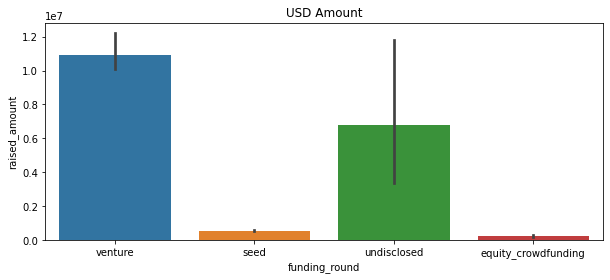

In [28]:
# lets plot based on results 
plt.figure(figsize=(10,4))
a=sns.barplot(x='funding_round_type', y='raised_amount_usd'
              , data=df1_company)
a.set(xlabel='funding_round',ylabel='raised_amount')
a.set_title("USD Amount")
plt.show()

In [29]:
# country wise funding 
df_company_funding = df1_company[df1_company['funding_round_type'] == 'venture']
df_venture = df_company_funding.groupby('country_code')
df_venture['raised_amount_usd'].sum().sort_values(ascending=
                    False).head(9)

country_code
USA    2.073456e+11
0      3.574916e+10
GBR    1.842098e+10
CAN    9.078461e+09
CHN    8.189876e+09
IND    8.079915e+09
DEU    5.732918e+09
FRA    5.144622e+09
ISR    3.996601e+09
Name: raised_amount_usd, dtype: float64